In [7]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as mp  
import math  
%matplotlib inline

In [8]:
data = {'The drinked one ': np.around(np.random.normal(0.7, 0.1,size=20),2),
        'Under the drugs':np.around(np.random.normal(0.4,0.2,size=20),2), 
        'normal condition':np.around(np.random.normal(0.2,0.1,size=20),2)}


data =  pd.DataFrame (data)   

print("This data shows the distribution of car crashes dur to drivers physial condition (in percent) ")
data



This data shows the distribution of car crashes dur to drivers physial condition (in percent) 


,The drinked one,Under the drugs,normal condition
0,0.89,0.10,0.04
1,0.81,0.27,0.36
2,0.70,0.54,0.35
3,0.79,0.26,0.33
4,0.83,0.29,0.21
5,0.69,0.37,0.08
6,0.46,0.64,0.38
7,0.56,0.72,0.26
8,0.65,0.65,0.05
9,0.85,0.31,0.36


In [9]:
# code to demonstrate mean 

def show_inf(p_data):  
    val=list(p_data.columns) 

   
    data = {'mean': {'The drinked one ': np.mean(np.array(p_data[val[0]])),
        'Under the drugs': np.mean(np.array(p_data[val[1]])), 
        'normal condition': np.mean(np.array(p_data[val[2]]))},
        '     standard deviation': {'The drinked one ': np.std(np.array(p_data[val[0]])),
        'Under the drugs': np.std(np.array(p_data[val[1]])), 
        'normal condition': np.std(np.array(p_data[val[2]]))}}
                                   
    data =  pd.DataFrame (data)   
    print(data)
    
show_inf(data)


                   mean       standard deviation
The drinked one   0.713                 0.113362
Under the drugs   0.379                 0.187614
normal condition  0.226                 0.118676


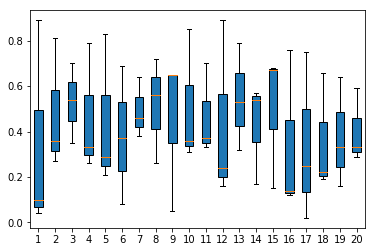

In [10]:
mp.boxplot(data, vert=True,patch_artist=True);

In [11]:
def values(p_data): 
    val=[]
    for i in range(len(list(p_data.columns))): 
        val.append(np.array(data[list(data.columns)[i]]))  
    summa=[] 
    
    for i in range(len(val)):
        summa.append(np.sum(val[i])) 
        
    T_summ =list(map(lambda x:x*x,summa)) 
    F_T=np.sum(T_summ)
    n=int(len(p_data)) 
    c = int(len(p_data.columns))
    N=n*c 
    sq=np.power(np.sum(summa),2)
    sq_val = float(sum((list(map(lambda x:x*x,np.array(val).flatten()))))) 
    
    SS_in_gr = (F_T/n) - (sq/N) 
    SS_t_gr = float(sq_val-(sq/N)) 
    SS_a = SS_t_gr - SS_in_gr  
    d_fact = c-1  
    d_com= N-1 
    d_ac = d_com - d_fact 
    F_emp = (SS_in_gr/d_fact)/(SS_a/d_ac)  
    
    tabl= pd.read_excel("Таблиця критичних значень для критерію Фішера.xlsx") 
    if((SS_in_gr/d_fact)>40 and (SS_a/d_ac)>130): 
        F_cr = tabl.iloc[31,14]   
    elif((SS_a/d_ac)>130): 
        F_cr = tabl.iloc[SS_a/d_ac,14] 
    elif((SS_in_gr/d_fact)>40): 
        F_cr = tabl.iloc[31,SS_in_gr/d_fact]
    else: 
        F_cr = tabl.iloc[int((SS_a/d_ac))+1,int((SS_in_gr/d_fact))+1]  
        
    if(F_emp>F_cr): 
         print('The averages of independent groups are not equal')
    else:
        print("The averages of independent groups are  equal") 
        
    M_fact = SS_in_gr/d_fact 
    M_as = SS_a/d_ac 
    
    return pd.DataFrame({
        'Intragroup Variance': SS_in_gr, 
        'Groupwide Variance':SS_t_gr, 
        "Residual variance":  SS_a, 
        "The number of degrees of freedom (fact)":pd.Series(d_fact), 
        "The number of degrees of freedom (comm)":pd.Series(d_com), 
        "The number of degrees of freedom (accident)":pd.Series(d_ac), 
        "MS actual":M_fact, 
        "MS accidentally":M_as, 
        'F empr':F_emp, 
        'F tabl':F_cr,
    })

values(data)

The averages of independent groups are  equal


,Intragroup Variance,Groupwide Variance,Residual variance,The number of degrees of freedom (fact),The number of degrees of freedom (comm),The number of degrees of freedom (accident),MS actual,MS accidentally,F empr,F tabl
0,2.480893,3.723573,1.24268,2,59,57,1.240447,0.021801,56.89756,199.5
